# Intro to `pandas`

`pandas` is the `panel data system` ([comments on pronunciation](https://twitter.com/wesmckinn/status/706529447965433856))

## Super-basic intro

Material here includes basic examples taken from the [learn-pandas Bitbucket repo](https://bitbucket.org/hrojas/learn-pandas)

Set up a small `DataFrame` for experimenting. This is artificial, as we will almost always be importing data from some external source ...

In [1]:
import pandas as pd
# The initial set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
z = list(zip(names,births))
p = pd.DataFrame(z)
p    ## notebooks automatically print the *last* result returned in each chunk

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Various ways of indexing. (Note the current example is a little artificial; normally the columns (`Series`) within the data frame will have meaningful names we'll use to index. In addition, the rows may have a **key** assigned that we'll be able to use to (very efficiently) index and sort by row.  For now, though, the column and row indices are just integers ...)

In [2]:
p[1]        ## extract a column = Series (by *name*)
p[2:3]      ## slice one row
p[2:5]      ## slice multiple rows
p[[0,1]]    ## extract multiple columns (data frame)
p.iloc[1,1] ## index with row/column integers like an array

155

In [3]:
p.rename(columns={0:"names", 1:"count"}, inplace=True)  ## add names
p["names"]          ## extract by column index (name)    
p.names             ## extract as attribute
p.loc[1:2,"names"]  ## index by *label*, _inclusive_

1    Jessica
2       Mary
Name: names, dtype: object

Figuring out where I am so I can find the appropriate data file ...

In [4]:
import os
os.getcwd()

'/media/sf_Documents/classes/math1mp3/math1mp/notes'

# Measles data

I downloaded US measles data from [Project Tycho](https://www.tycho.pitt.edu/index.php).

- `read_csv` reads a CSV file as a **data frame**; it automatically interprets the first row as headings
- `df.head()` shows just at the beginning; `df.tail()` shows just the end





In [5]:
v = "./MEASLES_Cases_1909-2001_20150322001618.csv"  ## file name
p  = pd.read_csv(v,skiprows=2,na_values=["-"])      ## read in data

`.info()` gives us basic information about a DataFrame (doing a little bit of magic here so we don't have to look at the whole thing, which is long)

In [6]:
%%capture capt
p.info()

In [7]:
print(capt.stdout[1:499]+"...")

class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 62 columns):
YEAR                        4861 non-null int64
WEEK                        4861 non-null int64
ALABAMA                     2154 non-null float64
ALASKA                      704 non-null float64
AMERICAN SAMOA              3 non-null float64
ARIZONA                     2353 non-null float64
ARKANSAS                    1870 non-null float64
CALIFORNIA                  2997 non-null float64
...


In [8]:
p.head()                     ## look at the first little bit

,YEAR,WEEK,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,...,UPSTATE NEW YORK,UTAH,VERMONT,VIRGIN ISLANDS,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Unnamed: 61
0,1909,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this starts at the beginning, before data is available for most states, most of the cells are filled with `NaN` values (which stands for "not a number"), which `pandas` uses to denote missingness. However, let's just ignore them for now.

Let's be ambitious and plot *all* the data (leaving out the `WEEK` and `YEAR` columns) as a function of time, with a log-scaled y axis (`plt.semilogy()`) ...

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
all_data = p.loc[:,"ALABAMA":]
## equivalently: all_data=p.drop(["YEAR","WEEK])
ax.semilogy(all_data);



We can use `.isnull()` to test whether values are missing or not (testing whether they are equal to the special value `numpy.nan`  **does not work** ...)


In [10]:
p.ALABAMA.isnull().head()

0    True
1    True
2    True
3    True
4    True
Name: ALABAMA, dtype: bool

`.sum()` applied to a logical array counts the number of `True` values ...

In [11]:
p.ALABAMA.isnull().sum()

2707

Let's say we want to get the number of missing values in *every* column. First we'll use `.isnull()` on the whole DataFrame, then `.sum()` to count the number missing in each column

In [12]:
all_missing = all_data.isnull()
n_all_miss = all_missing.sum()
n_all_miss.head()

ALABAMA           2707
ALASKA            4157
AMERICAN SAMOA    4858
ARIZONA           2508
ARKANSAS          2991
dtype: int64

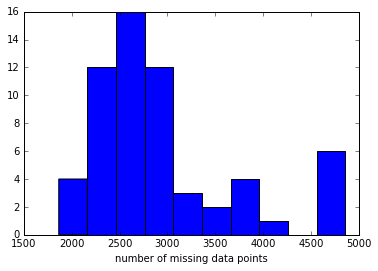

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(n_all_miss)  ## do this in a "non-pythonic" way (auto plot setup)
plt.xlabel("number of missing data points");


We can also do the sum across rows (`axis=1`) and plot the results ...

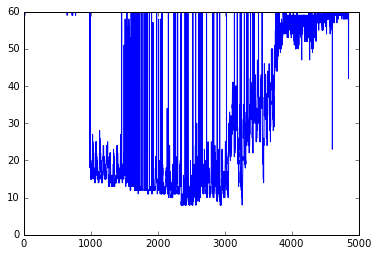

In [14]:
tot_missing = all_missing.sum(axis=1)
plt.plot(tot_missing);

If we try to do any operations with Series with `nan` values in them we're in trouble ...

In [15]:
sum(p.ALABAMA)

nan

Unfortunately this makes sense. "Anything + `nan`" *should* be `nan`; so should "Anything * `nan`" ... If we just want to get rid of `nan` values we can use `.dropna()` ...

In [16]:
ALABAMA_nona = p.ALABAMA.dropna()
print(sum(ALABAMA_nona))
## ~ (tilde/twiddle) is "logical not" for pandas objects ...
(len(p.ALABAMA),sum(~p.ALABAMA.isnull()),len(ALABAMA_nona))

209536.0


(4861, 2154, 2154)

Now we might want to figure out how far we have to go in a series to find the first non-`NaN` value ... it's a little sneaky we can use `.argmin()` for this ...

- `.isnull()` turns `nan` values to `True`, which in turn gets translated to 1 when we do a numerical operation
- `.argmin()` returns the index of the **first** occurrence of the minumum value, which is 0 = `False` = not `nan`

In [17]:
first_alabama = p.ALABAMA.isnull().argmin()
print(first_alabama)

985


Which time period does this correspond to?

In [18]:
p.loc[first_alabama,"YEAR":"WEEK"]

YEAR    1927.0
WEEK      47.0
Name: 985, dtype: float64

Let's make a function to simplify this a bit ...

In [19]:
def first_val(x):
    return(x.isnull().argmin())

Now we want to run this on all of the data columns (not the `YEAR` and `WEEK` columns). We could use a `for` loop, but it's more compact and pandas-ish to use `.apply()` for this.  In general, `.apply()` takes *any* function and runs it on each column of a DataFrame.

In [20]:
all_first_vals = p.loc[:,"ALABAMA":].apply(first_val)
all_first_vals.head()


ALABAMA            985
ALASKA            2348
AMERICAN SAMOA    4125
ARIZONA            985
ARKANSAS           985
dtype: int64

What if we want a histogram of all of the non-`nan` data?  First we `.unstack()` the data to convert it into a single vector, then we `.dropna()`, then we plot the histogram of $\log(1+x)$ ...

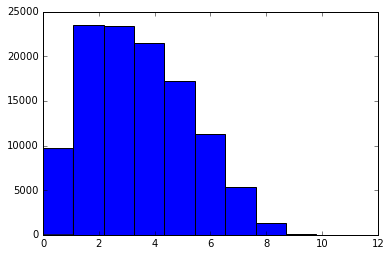

In [29]:
import numpy as np
plt.hist(np.log(1+all_data.unstack().dropna()));

# Data cleaning

In [33]:
p.max().sort_values().tail()

NEW YORK           8831.0
OHIO               9278.0
KENTUCKY          10402.0
VIRGIN ISLANDS    53000.0
Unnamed: 61           NaN
dtype: float64

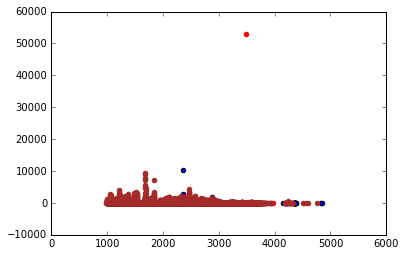

In [49]:
plt.scatter(p.index,p.KENTUCKY)
plt.scatter(p.index,p["VIRGIN ISLANDS"],color="red");
plt.scatter(p.index,p.OHIO,color="brown");

## Filtering

Choosing specific rows of a data frame; `&`, `|` ,`~` correspond to `and`, `or`, `not`
(individual elements *must* be in parentheses)


In [22]:
p.ALABAMA[(p.YEAR==1970) & (p.ALABAMA>50)]               

3235    98.0
3236    56.0
3238    69.0
Name: ALABAMA, dtype: float64

## Indexing

Use `.index()` to assign an index to the *rows* of a DataFrame; the rows can be used in `.loc()`, will also be included automatically as the x-axis variable in any plots ...

In [23]:
p_short = p.iloc[first_val(p.ALABAMA):,:]         ## drop first bit with many NAs
p_short.index = p_short.YEAR+(p_short.WEEK-1)/52  ## assign 'Julian date' as index
p_dateinfo = p_short[["YEAR","WEEK"]]             ## save date info for future reference
p_short.drop(["WEEK","YEAR"],inplace=True,axis=1)           ## .... and drop from the DataFrame
p_short.head()


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,UPSTATE NEW YORK,UTAH,VERMONT,VIRGIN ISLANDS,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Unnamed: 61
1927.884615,40.0,NaN,NaN,1.0,6.0,37.0,17.0,36.0,4.0,NaN,...,NaN,1.0,0.0,NaN,NaN,77.0,20.0,85.0,11.0,NaN
1927.903846,38.0,NaN,NaN,2.0,63.0,36.0,2.0,29.0,0.0,NaN,...,NaN,0.0,2.0,NaN,NaN,214.0,7.0,120.0,2.0,NaN
1927.923077,44.0,NaN,NaN,9.0,22.0,53.0,11.0,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,166.0,30.0,84.0,10.0,NaN
1927.942308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927.961538,43.0,NaN,NaN,2.0,16.0,17.0,16.0,35.0,2.0,NaN,...,NaN,2.0,NaN,NaN,NaN,138.0,48.0,106.0,NaN,NaN


Plot results:

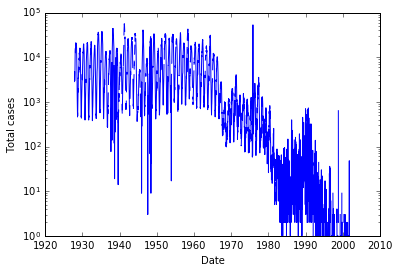

In [24]:
plt.semilogy(p_short.sum(axis=1))
plt.xlabel("Date")
plt.ylabel("Total cases");

## Aggregation

The `.groupby()` method adds



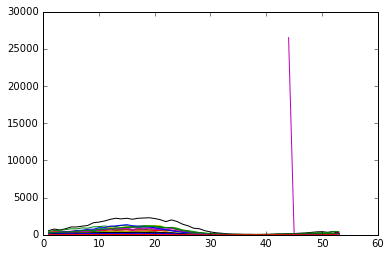

In [25]:
p_week = p_short.groupby(p_dateinfo.WEEK)
p_week_mean = p_week.aggregate(np.mean)
plt.plot(p_week.aggregate(np.mean));

In [26]:
p_week_mean.max(axis=0).sort_values().tail()

CALIFORNIA         1267.722222
TEXAS              1365.163636
NEW YORK           2291.470588
VIRGIN ISLANDS    26500.500000
Unnamed: 61                NaN
dtype: float64

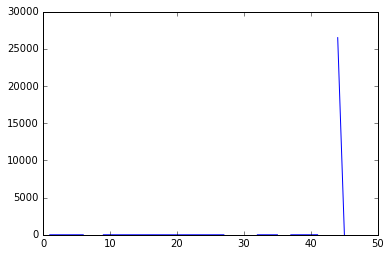

In [27]:
plt.plot(p_week_mean["VIRGIN ISLANDS"]);

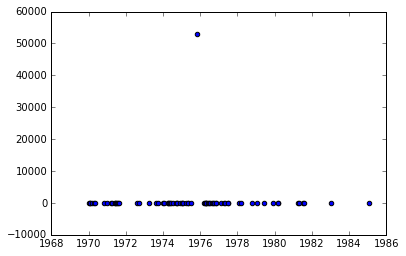

In [28]:
plt.scatter(p_short.index,p_short["VIRGIN ISLANDS"]);